<a href="https://colab.research.google.com/github/Rounak-Das-02/Walmart-Price-Prediction/blob/master/Walmart%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [0]:
!git clone https://github.com/RAHULKASHYAP02/WALMART-STORE-SALES-PREDICTION-FORECASTING.git

fatal: destination path 'WALMART-STORE-SALES-PREDICTION-FORECASTING' already exists and is not an empty directory.


In [0]:
train = pd.read_csv("/content/WALMART-STORE-SALES-PREDICTION-FORECASTING/data/train.csv")

In [0]:
df = pd.read_csv("/content/WALMART-STORE-SALES-PREDICTION-FORECASTING/data/train.csv")

In [91]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [92]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [0]:
train["year"] = pd.to_datetime(train["Date"]).dt.year
train["month"] = pd.to_datetime(train["Date"]).dt.month
train["day"] = pd.to_datetime(train["Date"]).dt.day

In [0]:
readl_date = np.array(train["Date"])
train = train.drop("Date" ,axis = 1)

In [95]:
target = train.Weekly_Sales
target

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [0]:
train = train.drop("Weekly_Sales" , axis = 1)

In [97]:
train .head()

,Store,Dept,IsHoliday,year,month,day
0,1,1,False,2010,2,5
1,1,1,True,2010,2,12
2,1,1,False,2010,2,19
3,1,1,False,2010,2,26
4,1,1,False,2010,3,5


In [0]:
x_train , x_test , y_train , y_test = train_test_split(train , target , test_size = 0.2)

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
joblib.dump(x_train , "to be fit_transformed into the Standard Scaler")

['to be fit_transformed into the Standard Scaler']

In [0]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
rfr = RandomForestRegressor()
rfr.fit(x_train , y_train)
y_pred = rfr.predict(x_test)
print(r2_score(y_test , y_pred))
y_pred

0.9742819317687196


array([59138.1146,   343.376 ,   730.9704, ...,  2954.1968,    78.6944,
         143.54  ])

In [0]:
from sklearn.externals import joblib

In [0]:
joblib.dump(rfr , "model.pkl")

['model.pkl']

In [1]:
import matplotlib.pyplot as plt
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
model = joblib.load("/content/model.pkl")

In [0]:
x_train = joblib.load("/content/to be fit_transformed into the Standard Scaler")

In [0]:
test = pd.read_csv("/content/WALMART-STORE-SALES-PREDICTION-FORECASTING/data/test.csv")

In [103]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [0]:
test["year"] = pd.to_datetime(test["Date"]).dt.year
test["month"] = pd.to_datetime(test["Date"]).dt.month
test["day"] = pd.to_datetime(test["Date"]).dt.day

In [0]:
dates = np.array(test["Date"])

In [0]:
test = test.drop("Date" ,axis =1)

In [107]:
test.head()

,Store,Dept,IsHoliday,year,month,day
0,1,1,False,2012,11,2
1,1,1,False,2012,11,9
2,1,1,False,2012,11,16
3,1,1,True,2012,11,23
4,1,1,False,2012,11,30


In [0]:
sc = StandardScaler()
ty = sc.fit_transform(x_train)
test = sc.transform(train)


In [0]:
output = model.predict(test[:100])

In [110]:
output

array([27858.8952, 48954.9944, 39067.6415, 22092.6015, 22279.0308,
       22556.9697, 23471.302 , 25542.7983, 57312.6989, 46686.3269,
       21844.0157, 23803.0349, 19721.7517, 17477.7599, 16945.108 ,
       15151.676 , 15576.8279, 17333.7892, 16708.0851, 16414.1681,
       16032.7514, 16347.8668, 17167.3004, 16317.4242, 15540.2671,
       15611.3905, 17171.1146, 16000.8294, 15616.186 , 15594.7582,
       16455.0066, 17825.774 , 18763.7465, 18182.5718, 23029.9349,
       23349.3738, 25506.6977, 26929.8803, 40505.7575, 28199.6311,
       19611.563 , 20090.7917, 19512.203 , 27694.6143, 33827.5804,
       47201.8398, 58429.7488, 18617.6161, 16538.9669, 17294.5375,
       17998.3096, 18923.8454, 28606.8002, 37073.1882, 46682.0263,
       21660.2337, 20788.7807, 21287.3343, 21975.4042, 21759.9632,
       20858.6987, 26441.6767, 30176.1844, 43493.0227, 43439.8491,
       17045.2864, 16878.7781, 15312.7992, 15588.1151, 16321.8964,
       16211.2275, 16337.125 , 15703.0349, 15661.4881, 16450.1

In [0]:
import matplotlib.pyplot as plt

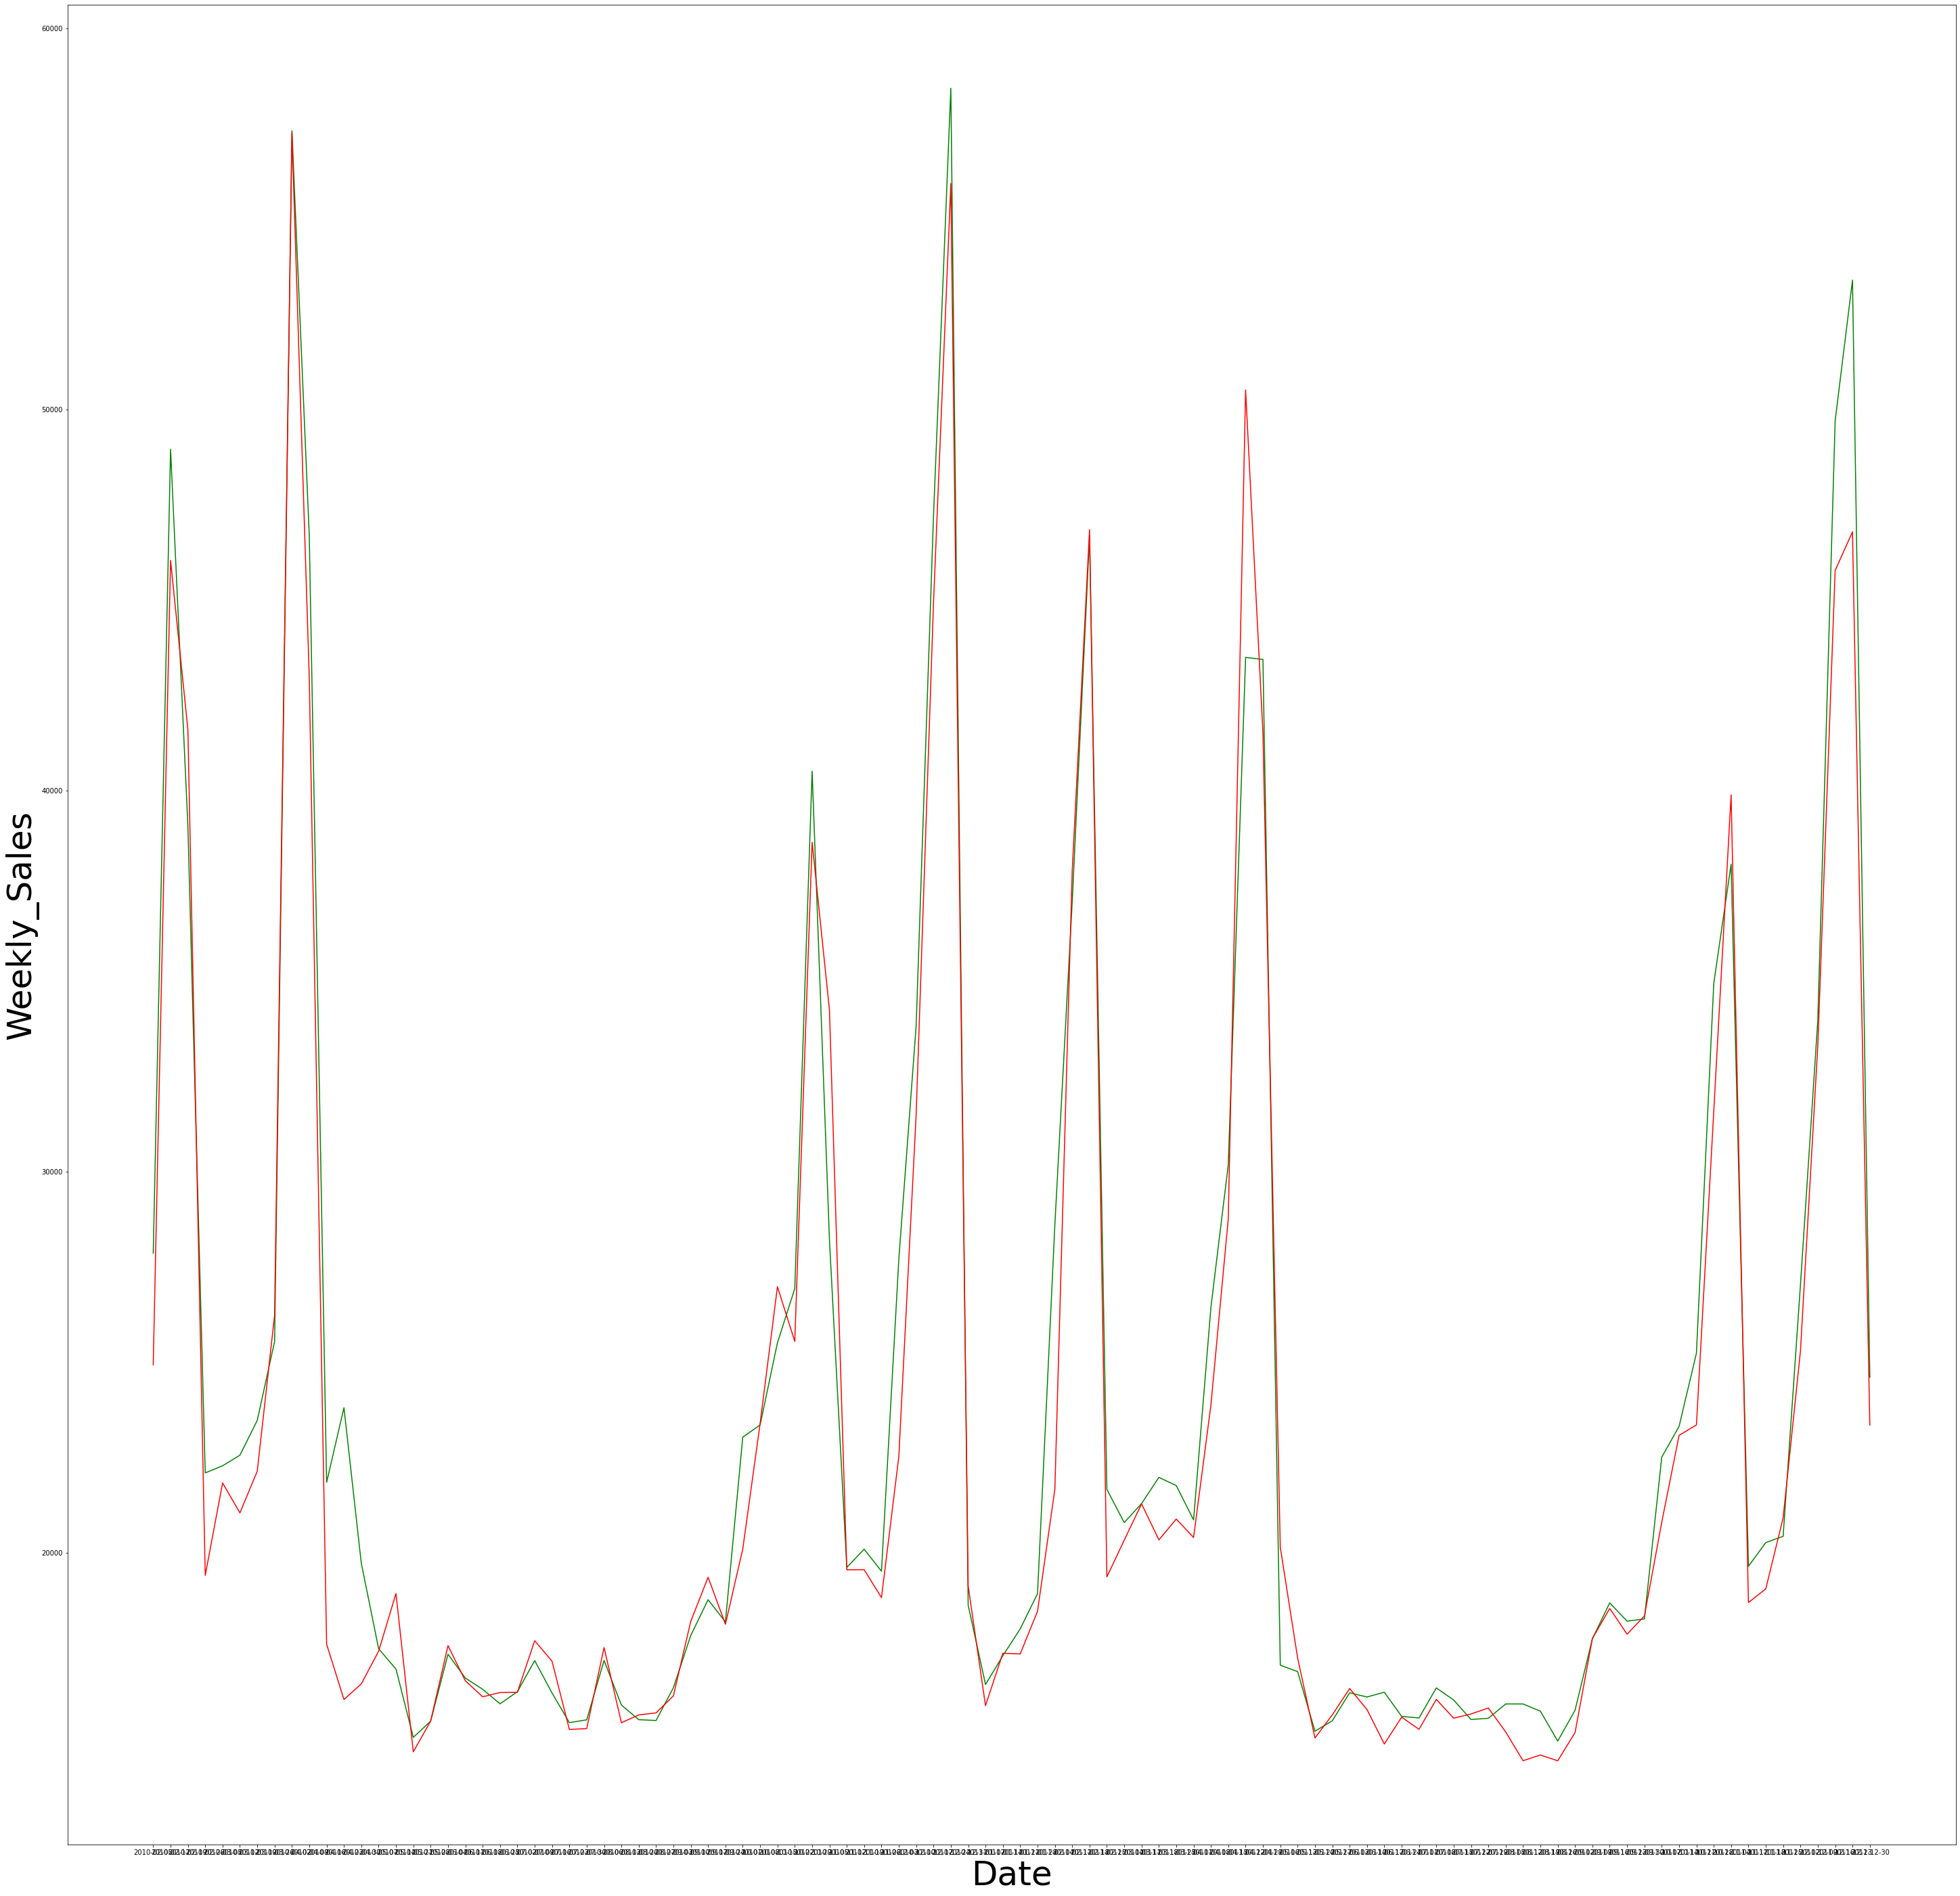

In [112]:
plt.figure(0,figsize = [50,50])
plt.plot(readl_date[:100] , output , color = "green")
plt.plot(readl_date[:100] , target.head(100) , color = "red")
plt.xlabel("Date" , size = 50)
plt.ylabel("Weekly_Sales" , size = 50)
plt.show()